## Instructions
- See deadline on the course web page
- This problem set is performed individually. See examination rules on the course web page.
- Students are allowed to discuss together and help each other when solving the problems. However, every student must understand and be able to explain his/her submitted solution. Plagiarism is not allowed (submissions will be both manually and automatically monitored).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.
- Note that grading is performed in the teacher's python environment, which is based on the conda `environment.yml` file in the course github repo. Please avoid using additional python modules (such as `plotly`) as this might cause automatic tests to fail.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook and that this part does not raise any `AssertionError`(s). 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [3]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Lozada'  # string
student['Firstname']='Alejandro' # string
student['CID']='lozadaa'        # string
student['DOB-year']=1997         # four-digit integer
student['DOB-month']=4           # integer in the range [1, 12]
student['DOB-day']=17             # integer in the range [1, 31]

# YOUR CODE HERE

In [4]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

By changing the below boolean variable `student_self_assessment` to `True` you attest that:
1. All handed in solutions were produced by yourself in the sense that you understand your solutions and should be able to explain and discuss them with a peer or with a teacher.
2. That discussions with your peers are allowed, also concerning approaches to solve the problem sets, but that direct plagiarism is not allowed and that you must reach your own understanding of submitted solutions according to the definition in the previous point.

In [5]:
student_self_assessment = True

# YOUR CODE HERE

In [6]:
assert student_self_assessment == True, 'You must assert the individual solution statements.'

In [7]:
# imports
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2

# Problem Set 3
## Basic problems
### Learning from data [TIF285], Chalmers, Fall 2022

Last revised: 26-Sep-2022 by Christian Forssén [christian.forssen@chalmers.se]

In [23]:
import os
# Data files are stored in
DATA_DIR = "DataFiles/"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Problem 1: Assigning probabilities for a hundred-sided dice¶
### (2 points)

Consider a ($M=100$) hundred-sided dice (labeled with 1, 2, 3, ..., 100) for which you know 

Case 1. that the mean of a large number of rolls is $\mu_1 = \frac{1}{100}\sum_{i=1}^{100} i$.

Case 2. that the mean of a large number of rolls is $\mu_2=40$ and that the standard deviation is $\sigma_2=25$.

### Task a)
* Use the principle of maximum entropy to assign the probabilities $\{ p_i \}_{i=1}^{100}$ for the outcomes of a dice roll in the two different cases. Employ the method of Lagrange multipliers to derive (analytical) expressions for $p_i$.
* Your expressions might contain (yet undetermined) Lagrange multipliers.
* Use the markdown cell below to perform the analytical derivation and present the results for $p_i$ in case 1 and case 2. Start by writing down the expression for the entropy with the relevant Lagrange-multiplier terms.

*Hint: There are various constraints from the known information: the normalization of the probabilities $\mathcal{N} = \sum_i p_i = 1$ and the mean result $\mu=\sum_i i p_i$. In case 2 there is also a third constraint in the variance $\sigma^2 = \sum_i (i-\mu)^2 p_i$. Set the so called Lebesque measure $m_i = \mathrm{constant}$.*

Case 1:

We start by writing our constraints: 

a) $\sum_i^{100}ip_i = \mu_1 = 50.5 \rightarrow \sum_i^{100}ip_i - \mu_1 = 0$

b) $\sum_i^{100}p_i = 1 \rightarrow \sum_i^{100}p_i - 1 = 0$ 

Now, we have our Lagrangian:

$\mathcal{L} = f(x) + \lambda_0g_0(x) + \lambda_1g_1(x) $ 

Where $f(x)$ is the function to optimize (in our case, the entropy) and $\{g_0, g_1\}$ constraints "a" and "b". And so:

$Q(\{p_i\};\lambda_0,\lambda_1) = - \sum_i^{100}p_ilog(p_i) + \lambda_0\left(1-\sum_i^{100}p_i\right) + \lambda_1\left(\mu_1 - \sum_i^{100}ip_i\right)$

Now we need to find $p_i$ for which $Q(\{p_i\};\lambda_0,\lambda_1)$ has a minimum

$\frac{\partial Q}{\partial p_i} = -\left(log(p_i) + 1\right) - \lambda_0 - i\lambda_1 = 0$

$log(p_i) = - 1 - \lambda_0 - i\lambda_1$

$p_i = e^{-(1+\lambda_0)}e^{-i\lambda_1} \rightarrow p_i = Ne^{-i\lambda_1}$

Case 2:

We start by writing our constraints: 

a) $\sum_i^{100}ip_i = \mu_2 = 40 \rightarrow \sum_i^{100}ip_i - \mu_2 = 0$

b) $\sum_i^{100}p_i = 1 \rightarrow \sum_i^{100}p_i - 1 = 0$ 

c) $\sum_i(i-\mu_2)^2p_i = \sigma_2^2 = 25^2 \rightarrow \sum_i(i-\mu_2)^2p_i - \sigma_2^2 = 0$

Now, we have our Lagrangian:

$\mathcal{L} = f(x) + \lambda_0g_0(x) + \lambda_1g_1(x) + \lambda_2g_2(x)$ 

Where $f(x)$ is the function to optimize (in our case, the entropy) and $\{g_0, g_1, g_2\}$ constraints "a", "b" and "c". And so:

$Q(\{p_i\};\lambda_0,\lambda_1, \lambda_2) = - \sum_i^{100}p_ilog(p_i) + \lambda_0\left(1-\sum_i^{100}p_i\right) + \lambda_1\left(\mu_2 - \sum_i^{100}ip_i\right) + \lambda_2\left(\sum_i(i-\mu_2)^2p_i - \sigma_2^2\right)$

Now we need to find $p_i$ for which $Q(\{p_i\};\lambda_0,\lambda_1)$ has a minimum

$\frac{\partial Q}{\partial p_i} = -\left(log(p_i) + 1\right) - \lambda_0 - i\lambda_1 + \lambda_2(i-\mu_2)^2$

$log(p_i) = - 1 - \lambda_0 - i\lambda_1 + \lambda_2(i-\mu_2)^2$

$p_i = e^{-(1+\lambda_0)}e^{-i\lambda_1}e^{\lambda_2(i-\mu_2)^2} \rightarrow p_i = Ne^{\lambda_2(i-\mu_2)^2-\lambda_1i}$

### Task b)
* Determine the still unknown Lagrange multipliers; you can do it numerically.
* Print the values of the Lagrange multipliers for each case (you don't need to print $\lambda_0$, but you should obviously make sure that the probability distribution is properly normalized.
* Assign the probabilities and make a bar plot for each case. Store the probabilities in the arrays `probs_1` and `probs_2`, each of shape (100,).
* Use only modules that are part of the `tif285-env` environment as autograding might otherwise fail.

In [27]:
# importing modules

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# YOUR CODE HERE

In [28]:
# We suggest to define helper functions (but you are free to use your own solution)
#
def pdf_1(lam, M=100):
    '''
    Returns an array of (normalized) probabilities for a given Lagrange multiplier. Case a.
    
    Args:
        lam: Lagrange multiplier (float)
        M: number of discrete probabilities (int)
        
    Returns:
        pdf: Array of shape (M,) of probabilities p_i = f_1(i,lam) / norm
    '''
    # YOUR CODE HERE

def pdf_2(lam1, lam2, mu, M=100):
    '''
    Returns an array of (normalized) probabilities for a given Lagrange multiplier and mean. Case b.
    
    Args:
        lam1: Lagrange multiplier for the mean constraint (float)
        lam2: Lagrange multiplier for the variance constraint (float)
        mu: mean value (float)
        M: number of discrete probabilities (int)
        
    Returns:
        pdf: Array of shape (M,) of probabilities p_i = f_2(i,lam,mu) / norm
    '''
    # YOUR CODE HERE

def moments(pdf):
    '''
    Returns the first few moments of a discrete pdf.
    
    Args:
        pdf: Array of shape (M,) of probabilities p_i
        
    Returns:
        moments: tuple of floats with the first few moments (norm, mean, variance) 
    '''
    # YOUR CODE HERE
    
# and to use the principle of maximum entropy to assign the probabilities 
Msides = 100
probs_1 = np.ones(Msides)
probs_2 = np.ones(Msides)

# Don't forget to also make a bar plot
# YOUR CODE HERE

In [29]:
# my own solution - case 1
def case1_pi(x):
    norm = 0
    mean = 0
    for i in range(1,101):
        # max entropy defined in task a
        mean += x[0]*i*np.e**(-i*x[1])
        # max entropy defined in task a
        norm += x[0]*np.e**(-i*x[1])
    return (mean -50.5, norm-1)

# (N, lambda_1)
lambda_1 = fsolve(case1_pi, [-0.10,0.09])
print('N:',lambda_1[0])
print('lambda_1:',lambda_1[1],'\n')

# check contraints of normality and mean
norm = 0
mean = 0
for i in range(1,101):
    norm += lambda_1[0]*np.e**(-i*lambda_1[1])
    mean += lambda_1[0]*i*np.e**(-i*lambda_1[1])
    
print('norm:',norm)
print('mean:',mean)

N: 0.009999999999999414
lambda_1: -4.855771608280826e-15 

norm: 1.0000000000001867
mean: 50.500000000013465


In [30]:
# my own solution - case 2
def case1_pi(x):
    norm = 0
    mean = 0
    variance = 0
    for i in range(1,101):
        # max entropy defined in task a
        mean += x[0]*i*np.e**(-i*x[1]+x[2]*(i-40)**2)
        
        # max entropy defined in task a
        norm += x[0]*np.e**(-i*x[1]+x[2]*(i-40)**2)
        
        # max entropy defined in task a
        variance += ((i-40)**2)*x[0]*np.e**(-i*x[1]+x[2]*(i-40)**2)
        
    return (mean -40, norm-1, variance-625)

# (N, lambda_1, lambda_2)
start=[-0.25330013, -0.44920736, -0.90281833]
lambda_2 = fsolve(case1_pi, start)
print('N:',lambda_2[0])
print('lambda_1:',lambda_2[1])
print('lambda_2:',lambda_2[2],'\n')

# check contraints of normality and mean
norm = 0
mean = 0
variance = 0
for i in range(1,101):
    norm += lambda_2[0]*np.e**(-i*lambda_2[1]+lambda_2[2]*(i-40)**2)
    mean += lambda_2[0]*i*np.e**(-i*lambda_2[1]+lambda_2[2]*(i-40)**2)
    variance += ((i-40)**2)*lambda_2[0]*np.e**(-i*lambda_2[1]+lambda_2[2]*(i-40)**2)
    
print('norm:',norm)
print('mean:',mean)
print('variance:',variance)

N: 0.01933128097842311
lambda_1: 0.009564832573999817
lambda_2: -0.00030180735179893077 

norm: 1.000000000002125
mean: 40.000000000117616
variance: 625.0000000002667


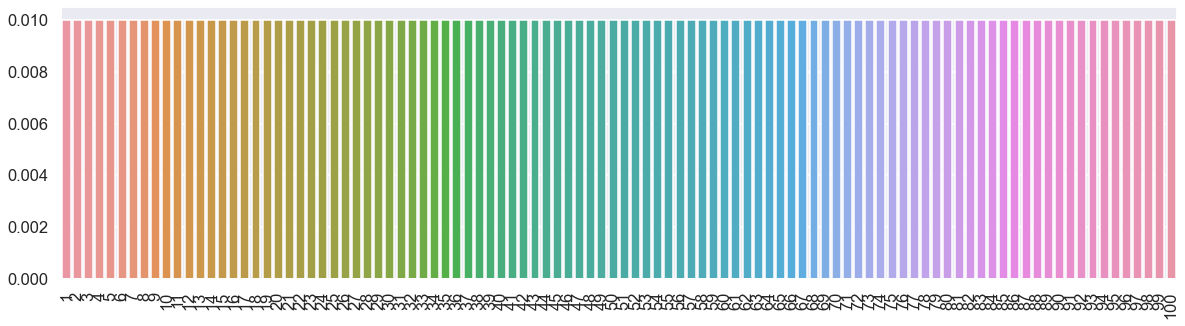

In [31]:
# plots - case 1
def pi_1(i, N, lambda_1):
    return N*np.e**(-i*lambda_1)

probs_1 = np.array([pi_1(i,lambda_1[0],lambda_1[1]) for i in range(1,101)])

plt.figure(figsize=(20,5))
sns.barplot(x=[i for i in range(1,101)],
            y=probs_1)
plt.xticks(rotation=90)
plt.show()

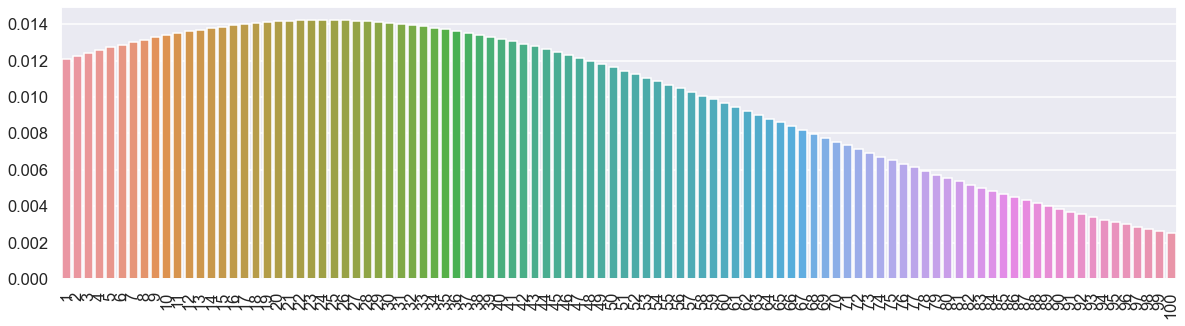

In [32]:
# plots - case 2
def pi_2(i, N, lambda_1, lambda_2):
    return N*np.e**(-i*lambda_1+lambda_2*(i-40)**2)
probs_2=np.array([pi_2(i,lambda_2[0],lambda_2[1],lambda_2[2]) for i in range(1,101)])
plt.figure(figsize=(20,5))
sns.barplot(x=[i for i in range(1,101)],
            y=probs_2)
plt.xticks(rotation=90)
plt.show()

In [33]:
for iprobs, probs in enumerate([probs_1,probs_2]):
    assert probs.shape == (100,), f'The array `probs` for case {iprobs} should be of shape (100,). probs.shape = {probs.shape}'
    assert np.abs(probs.sum()-1.0)<1e-6, f'The norm of array `probs` for case {iprobs} is {probs.sum}'


## Problem 2: Hypothesis testing using p-values
### (2 points)

Assume that you are analyzing a time series of data from an experiment that is searching for an annual modulation on top of a constant background (e.g. a signal that would be proportional to the flux of dark matter particles which is expected to have an annual modulation). 

The time series of data consists of $N = 60$ measurements that extends over a period of 5 years. The measurements are presented in some re-scaled, dimensionless units. From calibration measurements it is known that errors are statistically distributed with a standard deviation $\sigma = 5.0$.

### Tasks
* Read the data which has been generated using three different (unknown) scenarios: with different amplitudes of the annual modulation signal
* Consider the scenario that the signal is *constant*, with an unknown amplitude, as a null hypothesis.
* Compute, for each case, the chi-squared statistics: $\chi^2 = \sum_{i=1}^N \frac{( y_i - \bar{y} )^2}{\sigma^2}$, where the average value $\bar{y}$ is estimated from the sample $\{ y_i \}_{i=1}^{N}$.
* Make a plot of the expected $\chi^2$ distribution for the relevant number of degrees of freedom and compare with the statistic obtained for the actual data in each case.
* What is the *P-value* or *significance* of the data (for each case) from a frequentist point of view?
* Assume that we have decided beforehand the significance level 5% for this test. Would you *reject the null hypothesis with 95% confidence* for each particular case?

#### Notes:
* Save the p-value in the list variable `pvalue` (see cell below) as numbers between 0 and 1 (i.e., not percent)
* Should the null hypothesis be rejected for any of the three different cases? Save your answer in the list boolean variable `reject_null` (see below).


In [34]:
# importing modules

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# YOUR CODE HERE

Read data for case  0


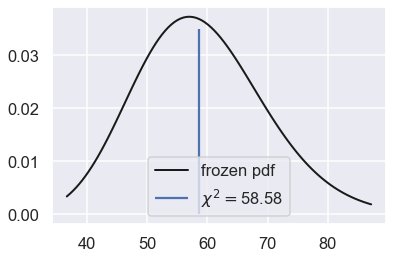

Read data for case  1


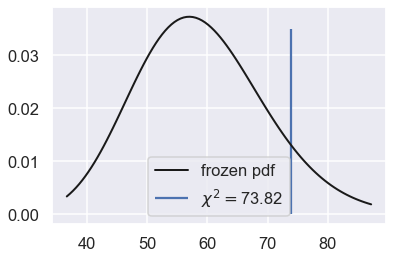

Read data for case  2


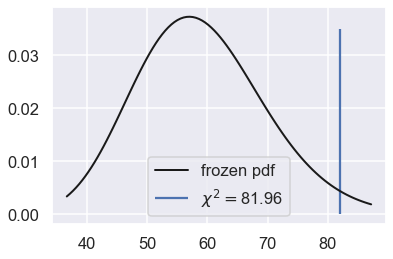

In [35]:
# Read the data and perform the tasks listed above
def chi2_mine(y):
    y_bar = np.mean(y)
    chi2 = np.sum((y-y_bar)**2/5**2)
    return chi2
# Save the p-value in the list variable `pvalue`
pvalue = [0., 0., 0.]
# Should the null hypothesis be rejected? Save your answer in the list boolean variable `reject_null`
reject_null = [False, False, False]

x = np.linspace(chi2.ppf(0.01, 59),
                chi2.ppf(0.99, 59), 100)
rv = chi2(59)

for icase, amp_annual in enumerate([5., 5., 5.]):
    print(f'Read data for case {icase:>2}')
    t,y = np.loadtxt(f'{DATA_DIR}/problem2_data{icase}.dat',unpack=True)
    chi = chi2_mine(y)
    p_value = 1- chi2.cdf(chi, 59, loc=0, scale=1)
    pvalue[icase] += p_value
    if p_value <= 0.05:
        reject_null[icase] = True
        
    plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
    plt.vlines(chi,0,0.035,label=f'$\chi^2 = ${round(chi,2)}')
    plt.legend()
    plt.show()
    plt.close()

In [18]:
assert len(reject_null)==3
assert len(pvalue)==3
assert not pvalue==[0.,0.,0.], 'update pvalue list'
assert not reject_null==[False,False,False], 'at least one null hypothesis should be rejected. '+f'{reject_null}'

## Problem 3: Gaussian Process regression
### (3 points)

In the following we will perform Gaussian Process regression of the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) ($\mu$) vs. [redshift](https://en.wikipedia.org/wiki/Redshift) ($z$) relation for a simulated set of 100 supernovas.

The data, 
$(z, \mu, \Delta \mu)$,
is generated from an underlying true distribution $p(z) \propto (z/z_0)^2 \exp[(z/z_0)^{1.5}]$ 
with $z_0 = 0.3$. An array with $(z_\mathrm{true}, \mu_\mathrm{true})$ is also available for comparison.

Credit: The data and a part of the problem formulation is obtained from the [AstroML]("http://www.astroml.org/") python module distributed under the 3-clause BSD license. For more information, see http://astroML.github.com.

The `GPy` library is needed to solve this task. You might also need to have `numpy` version >= 1.20. Can be checked by running

In [19]:
import numpy as np
print(np.__version__)

1.22.3


In [20]:
# The GPy library is needed to solve this task
#
import GPy
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# YOUR CODE HERE

### Initialization task
Load the experimental data and the true function data and plot $\mu = \mu(z)$. 

In [21]:
# Load experimental data sample
z_sample, mu_sample, dmu = np.loadtxt(f'{DATA_DIR}/cosmology_sample.dat',unpack=True)

# data must be two-dimensional for GPy
x = z_sample.reshape((-1,1))
y = mu_sample.reshape((-1,1))
print('The experimental data is of shape:', y.shape)

The experimental data is of shape: (100, 1)


In [22]:
# Load true function
z, mu_true = np.loadtxt(f'{DATA_DIR}/cosmology_true.dat',unpack=True)

print('The true function data is of shape:', mu_true.shape)

The true function data is of shape: (1000,)


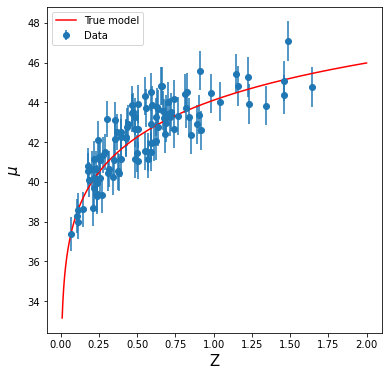

In [23]:
# Plot the data and the true function
plt.figure(figsize=(6,6))
plt.errorbar(x, y, dmu, fmt="o", label='Data')
plt.plot(z, mu_true,c='r',label='True model')
plt.xlabel('Z',fontsize=15)
plt.ylabel(r'$\mu$',fontsize=15)
plt.legend()

### Task 1 
Use the GPy python module to create a GP model with an RBF kernel. The GP model will contain a Gaussian noise term by default. 
* Use the default parameters of the RBF kernel as the initial guess. Print the hyperparameters of the kernel before doing optimization.
* Use GPy to optimize the model hyperparameters to the available data.
* Print the optimized GP model hyperparameters. Check in particular the Gaussian noise variance. Does it make sense given the uncertainites that were present in the experimental data? You can create a markdown cell below your solution where you add your commentary.
* What is the log likelihood of the data with this GP model? (*Hint*: Use the GPy `model.log_likelihood()` function , where `model` is a GPy regression model)
* Plot the GP regression model together with the data (the GPy plot command will by default show the mean prediction and the 95% credibility region).

In [24]:
# default
ker = GPy.kern.RBF(1)
print(ker)
model = GPy.models.GPRegression(x,y,ker)
print(model)

  rbf.         |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        

Name : GP regression
Objective : 1316.1261625137322
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


In [25]:
model.optimize()
print(model)


Name : GP regression
Objective : 152.57170381373516
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1000.2044402901375  |      +ve      |        
  rbf.lengthscale          |  3.0174646003419694  |      +ve      |        
  Gaussian_noise.variance  |  1.0005767169874682  |      +ve      |        


In [26]:
# log_likelihood
model.log_likelihood()

-152.57170381373516

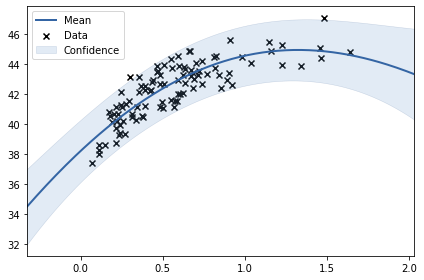

In [27]:
model.plot()
plt.show()

Comments missing here

### Task 2
Repeat the GP model optimization, but initialize the hyperparameters with 
* RBF lengthscale = 1.2
* RBF variance = 1000

From this initial guess, use GPy to optimize the model hyperparameters to the available data.
* Print the optimized GP model hyperparameters. 
* What is the log likelihood of the data with this GP model? 
* Plot the GP regression model together with the data.
* What are the main differences of the fit in Task 2 and the one in Task 1? In particular you should comment on differences in model hyperparameters and any visable consequences in the final GP model. You can create a markdown cell below your solution where you add your commentary.

In [28]:
ker = GPy.kern.RBF(1, variance=1000, lengthscale=1.2)
model = GPy.models.GPRegression(x,y,ker)
model.optimize()
print(model)


Name : GP regression
Objective : 151.9135392511926
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  rbf.variance             |  1000.0000119807419  |      +ve      |        
  rbf.lengthscale          |   1.436231038795881  |      +ve      |        
  Gaussian_noise.variance  |  0.9253990430421151  |      +ve      |        


 C:\Users\alejo\Anaconda3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


In [29]:
# log_likelihood
model.log_likelihood()

-151.9135392511926

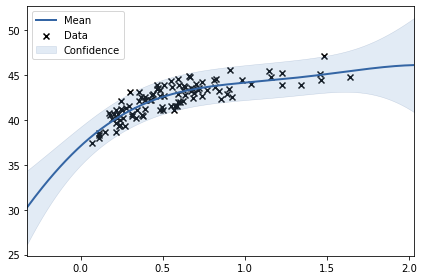

In [30]:
model.plot()
plt.show()

Comments missing here

### Task 3
* Create an array `Xp = numpy.linspace(0.0,2.0,50)[:,None]` to be used for predictions.
* Extract the mean vector and the covariance matrix from your GPy model object, `model`, using the command `mu, C = model.predict(Xp,full_cov=True)`
* Draw 20 samples from the multivariate Gaussian defined by `mu, C`.
* Extract the mean vector and the standard deviation vector of the 20 samples.
* Plot the sampled curves in a figure together with the mean and the $1\sigma$ and $2\sigma$ bands. (*Hint*: Use `alpha=0.3` when plotting the sampled curves in order to make them somewhat transparent).
* How does the result from this finite number of samples compare to the model plot that was produced in Task 2? You can create a markdown cell below your solution where you add your commentary.

In [32]:
from scipy.stats import multivariate_normal

Xp = np.linspace(0.0,2.0,50)[:,None]
mu, C = model.predict(Xp,full_cov=True)
samples = multivariate_normal.rvs(mu.flatten(),C,20)
std = np.std(samples, axis=0)
mean = np.mean(samples, axis=0)

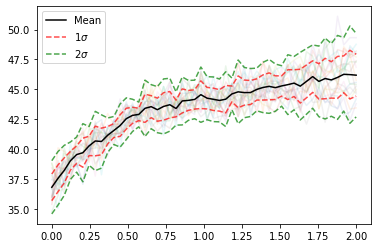

In [43]:
ax = plt.subplot(111)
for i in range(20):
    ax.plot(Xp,samples[i,:],alpha=0.1)
ax.plot(Xp,mean,color='black',label="Mean")
ax.plot(Xp, mean - std, color='red', linestyle='--',label='1$\sigma$', alpha=0.7)
ax.plot(Xp, mean + std, color='red', linestyle='--', alpha=0.7)
ax.plot(Xp, mean - 2*std, color='green', linestyle='--',label=r'2$\sigma$', alpha=0.7)
ax.plot(Xp, mean + 2*std, color='green', linestyle='--', alpha=0.7)
ax.legend()


## Problem 4: Single neuron classifier
### (3 points)

In [75]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set('talk')

### Background

The Ising model is arguably the most famous model in (condensed matter) physics. It is described by the simple Hamiltonian

$$
H=−J \sum_{\langle i,j \rangle} s_i s_j.
$$

Here, the $s_i=\{−1,1\}$ are classical, binary magnetic moments (spins) sitting on a two-dimensional square lattice and the $\langle i,j \rangle$ indicates that only interactions betweens neighboring spins are taken into account. For simplicity, we will set $J=1$.

Most importantly, the Ising model shows a phase transition between a paramagnetic and a ferromagnetic phase as a function of temperature. The critical temperature $T_c$ at which this change of magnetic character occurs has been calculated exactly by Lars Onsager. He found

$$
T_c = \frac{2}{\log \left( 1 + \sqrt{2} \right) }
$$

In [76]:
Tc = 2 / np.log(1+np.sqrt(2))
print(f"Critical temperature: Tc = {Tc:.4f}")

Critical temperature: Tc = 2.2692


In this problem we aim to reproduce this result (roughly) using a simple binary classifier (single neuron) that you implement yourself.

The classification problem can be made more sophisticated by introducing neural networks with several layers. Results from such an analysis made it all the way into a Nature Physics publication just a few years ago: [Nature Physics (2017) 13, 431–434](https://www.nature.com/articles/nphys4035)

We will start by quickly simulating the Ising model using the Monte Carlo method to obtain representative sets of spin configurations for a bunch of temperatures. 

#### Monte Carlo simulation
The Monte Carlo method for the Ising model is very straightforward: take a random configuration of spins to begin with and propose individual spin flips until you run out of steam. To decide whether a spin should be flipped we use the Metropolis criterium
$$
p=\min \left( 1, e^{-\beta\Delta E} \right)
$$
where $\Delta E = E′−E$ is the energy difference between the new (spin flipped) and the old configuration according to $H$ above and $\beta = 1/T$ is the inverse of the temperature $T$. Since $\Delta E$ only depends on the local environment of the spin to be flipped (nearest neighbors), we can evaluate it locally. 

#### Generate spin configurations and study the phase transition

In the python file attached with this notebook we have the definition of a `Lattice` class which can be used to generate a 2D lattice for `N` spins at a temperature `T`. Here, we simply import the `Lattice` class and use the `step` method to generate a lattice after a few hundred iterations to simulate a thermalization of the lattice. 

At every iteration, we select $N^2$ random points to try a flip attempt. A flip attempt consists of checking the change in energy due to a flip. If it is negative or less than $e^{-E/(k_b T)}$, then perform the flip. After a few steps the lattice with thermalize.



#### *You need the `lattice.py` file in the same directory to get this to work which contains the definition of `Lattice`*


In [77]:
from lattice import Lattice

In [78]:
# Initialize a lattice
lat = Lattice(N=10, T=4.5)

# Make 30 iterations (N**2 spin flip attempts)
for i in range(30):
    lat.step()

print(lat.lattice) # (or even `print lat` to use the convenient repr)

[[ 1  1  1 -1 -1 -1 -1 -1 -1  1]
 [ 1  1  1 -1 -1 -1 -1 -1  1  1]
 [-1  1  1 -1 -1  1  1 -1 -1 -1]
 [-1  1 -1 -1 -1 -1  1  1  1 -1]
 [-1 -1  1 -1  1 -1 -1  1  1 -1]
 [-1 -1  1  1 -1 -1 -1  1 -1 -1]
 [-1 -1  1  1 -1 -1  1 -1 -1 -1]
 [ 1 -1 -1 -1  1  1 -1  1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1  1 -1 -1]
 [ 1  1  1 -1 -1 -1 -1 -1 -1 -1]]


#### Illustrate some spin configurations, and plot macroscopic quantities as a function of temperature

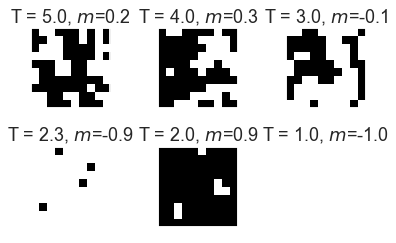

In [79]:
# 10 x 10 lattice
# six temperatures, 500 thermalization iterations
# Plot the spin configurations for varying temperatures.
# Display the magnetization too

nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows, ncols)
fig.subplots_adjust(wspace=0.6)

for (ip, T) in enumerate([5.0, 4.0, 3.0, 2.3, 2.0, 1.0]):
    lat = Lattice(N=10,T=T)
    for k in range(500):
        lat.step()

    idx = ip // ncols, ip % ncols

    axs[idx].matshow(lat.lattice,cmap=plt.cm.gray_r)
    axs[idx].set_title(f"T = {T:.1f}, $m$={lat.get_avg_magnetization():.1f}")

    axs[idx].get_xaxis().set_visible(False)
    axs[idx].get_yaxis().set_visible(False)

In [80]:
# 10 x 10 lattice
# 60 temperatures, 500 thermalization iterations

# For a temperature range, thermalize a lattice, then
# take a few hundred steps, recording energy and magnetization.
# Store the means to plot next.
# This takes about 60s with one modern core.

# Thermalization and measurement steps
ntherm = 500
nmeasure = 200

# points = array with (T, mean(E), abs(mean(M)), var(E))
# with the mean and variance evaluated for a list of many temperatures
points = []
# Storing nmeasure / nsparse data points
nsparse = 10
# points_full = array with (T, E, abs(M))
# for several different configurations per temperature
points_full=[]
for T in np.arange(4.0,1.0,-0.05):
    lat = Lattice(N=10,T=T)
    for _ in range(ntherm):
        lat.step()
    Es = []
    Ms = []

    for istep in range(nmeasure): 
        lat.step()
        Es.append(lat.get_energy())
        Ms.append(lat.get_avg_magnetization())
        if (istep%nsparse==0):
            points_full.append((T,Es[-1],np.abs(Ms[-1])))           
    Es = np.array(Es)
    Ms = np.array(Ms)
    points.append((T,Es.mean(),np.abs(Ms.mean()),Es.var()))
points = np.array(points)
points_full = np.array(points_full)

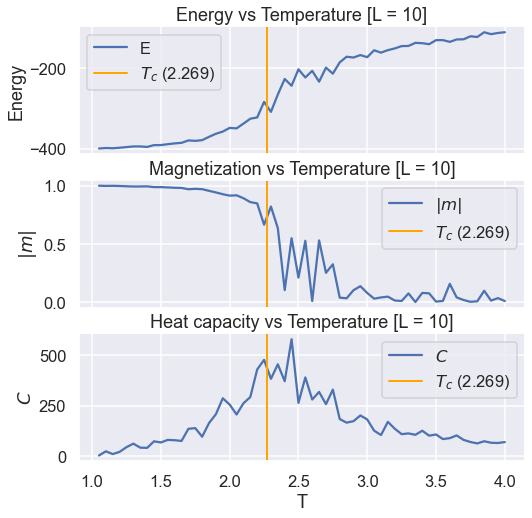

In [81]:
# Plot the energy, magnetization, and heat capacity vs temperature

fig, axs = plt.subplots(3,1,sharex=True,figsize=(8,8))

axs[0].plot(points[:,0],points[:,1], label="E")
axs[0].set_ylabel("Energy")
axs[0].set_title("Energy vs Temperature [L = 10]")

axs[1].plot(points[:,0],points[:,2], label="$|m|$")
axs[1].set_ylabel("$|m|$")
axs[1].set_title("Magnetization vs Temperature [L = 10]")

# heat capacity
# C = var(E) / ( k_B T**2)
heat_capacity = points[:,3] / (points[:,0]**2)
axs[2].plot(points[:,0],heat_capacity, label="$C$")
axs[2].set_xlabel("T")
axs[2].set_ylabel("$C$")
axs[2].set_title("Heat capacity vs Temperature [L = 10]")

for ax in axs:
    ax.axvline(x=Tc,linestyle='-', color="orange",linewidth=2.0, label="$T_c$ ({:.3f})".format(Tc))
    ax.legend(loc="best", numpoints=1)
    ax.grid(True)

#### Energy vs magnetization
Blue data is low temperature ($<T_c$) and red data is high temperature ($>T_c$).

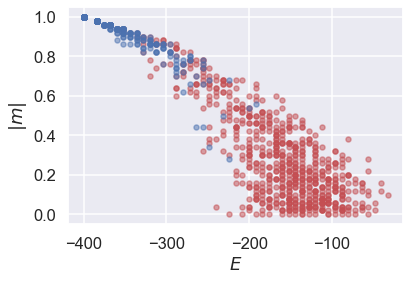

In [82]:
high_T = points_full[:,0]>Tc
low_T = points_full[:,0]<Tc

E_M_high = points_full[high_T][:,1:]
E_M_low = points_full[low_T][:,1:]

fig, ax = plt.subplots(1,1)
ax.scatter(E_M_high[:,0],E_M_high[:,1],c='r',alpha=0.5,s=25)
ax.scatter(E_M_low[:,0],E_M_low[:,1],c='b',alpha=0.5,s=25)
ax.set_xlabel("$E$")
ax.set_ylabel("$|m|$");

### Task: Single neuron binary classifier

Create a binary classifier that can take $(E,|m|)$ as input data and predict a binary label (0=below Tc, 1=above Tc).

**Hints:**
* Build your own binary classifier from a single neuron. Study the lecture notes and the exercise on logistic regression / neural networks.
* Normalize the data before training / testing (mean=0, standard deviation=1).
* Split into 70 % training data and 30% test data.
* Use weight decay alpha=1.0, learning parameter eta=0.01
* A rather large number of training iterations will be needed.
* Check visually that he final result looks reasonable. Training might lead to the wrong optimum in which case the decision boundary is clearly incorrect.

**How well does it perform? Plot the decision boundary.**

In [83]:
# Create a sigmoid function and a single neuron
def sigmoid(a):
    return 1/(1+np.e**(-a))

def single_neuron(x, w):

    a = np.dot(x,w[1:]) + w[0]
    return sigmoid(a)

def training(x,y,w,iterations):
    for i in range (iterations):
        y_hat = single_neuron(x, w) 
        gradient = (-y/(y_hat+0.000000000000001) + (1-y)/(1-y_hat+0.000000000000001))*y_hat*(1-y_hat)
        design=x.copy()
        design=np.c_[np.ones((x.shape[0], 1)), design]
        w -= 0.01*np.dot(gradient.T,design)   
        del design
    return w

In [84]:
assert sigmoid(0.0)==0.5, f'sigmoid(0.0)={sigmoid(0.0)}!=0.5'
assert (sigmoid(np.zeros(3))==0.5*np.ones(3)).all(), f'The sigmoid function should work with arrays'

x=np.array([[0,0],[1,1],[3,2]])
w=np.array([0.,1.,-1.])
output = single_neuron(x, w)
assert np.abs(output[0]-0.5)<0.01, f'output[0] = {output[0]}'


In [85]:
# Split the data and plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

target = points_full[:,0] 
X = points_full[:,1:] 


In [86]:
target[target<Tc] = 0
target[target>=Tc] = 1

<AxesSubplot:ylabel='count'>

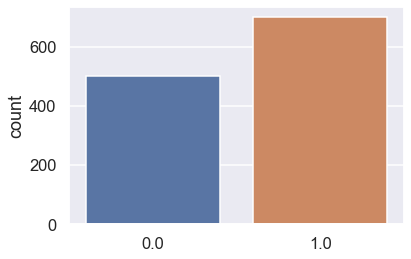

In [87]:
sns.countplot(x=target)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

In [89]:
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

In [90]:
# Train the single neuron binary classifier
w_initial = np.random.normal(size=(np.shape(X_train_scale)[1]+1))
w_final = training(X_train_scale, y_train, w_initial, iterations=30000)

In [91]:
w_final

array([ 1.72853463,  5.02525475, -0.08044889])

In [95]:
prediction = np.round(single_neuron(X_test_scale,w_final))

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       145
         1.0       0.96      0.97      0.96       215

    accuracy                           0.96       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.96      0.96       360



<AxesSubplot:>

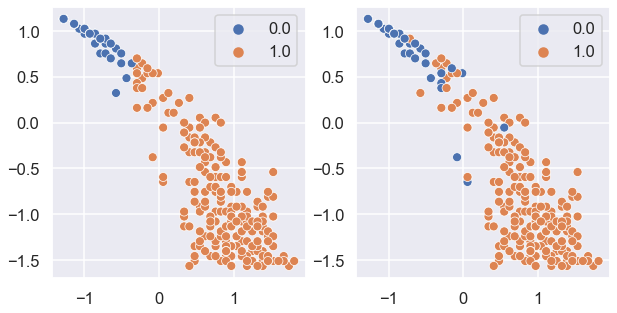

In [105]:
plt.figure(figsize=(10,5))
ax = plt.subplot(121)
ax1 = plt.subplot(122)
sns.scatterplot(x= X_test_scale[:,0],
                y= X_test_scale[:,1],
                hue= prediction,
                ax=ax)
sns.scatterplot(x= X_test_scale[:,0],
                y= X_test_scale[:,1],
                hue= y_test,
                ax=ax1)

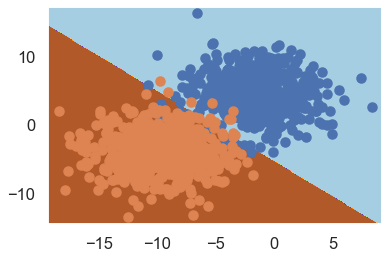

In [106]:
# decision surface for logistic regression on a binary classification dataset
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

Evaluate the final binary classifier and plot the 25%, 50%, 75% decision boundaries

In [ ]:
# Evaluate the final binary classifier and plot the 25%, 50%, 75% decision boundaries
#
# YOUR CODE HERE